# HW5. Корреляционный анализ
#### Ильичёв А.С., 693

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import pandas as pd

%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 5) 


# Задача 1

Воспользуемся таблицей сопряженности и вариантом критерия хи-квадрат для нее.

In [3]:
table = np.array([[13, 35, 26, 46],
                  [22, 45, 48, 75],
                  [18, 30, 15, 47],
                  [44, 62, 56, 68]])

In [4]:
chi2, p, dof, ex = sts.chi2_contingency(table, correction=False)
chi2, p, dof, ex

(16.275891254401127,
 0.06133904461935207,
 9,
 array([[17.90769231, 31.75384615, 26.76923077, 43.56923077],
        [28.35384615, 50.27692308, 42.38461538, 68.98461538],
        [16.41538462, 29.10769231, 24.53846154, 39.93846154],
        [34.32307692, 60.86153846, 51.30769231, 83.50769231]]))

Все значения таблицы `ex[i, j]`=$\frac{m_ik_j}{n}$ (в обозначениях лекции) больше 5, а значит, критерием можно пользоваться. Полученное p-value больше 0.05, то есть мы принимаем гипотезу о независимости породы от жирности молока на уровне 0.05.

# Задача 2

In [5]:
data = np.load('hw5t2a.npy')
data.shape

(200, 2)

In [6]:
X, Y = data.T

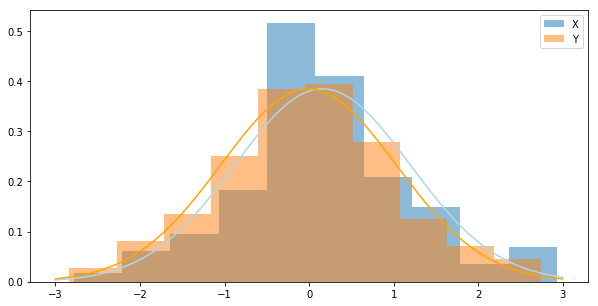

In [7]:
plt.hist(X, alpha=0.5, label='X', density=True)
plt.hist(Y, alpha=0.5, label='Y', density=True)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, sts.norm(X.mean(), X.std()).pdf(xs), c='lightblue')
plt.plot(xs, sts.norm(Y.mean(), Y.std()).pdf(xs), c='orange')
plt.legend()
plt.show()

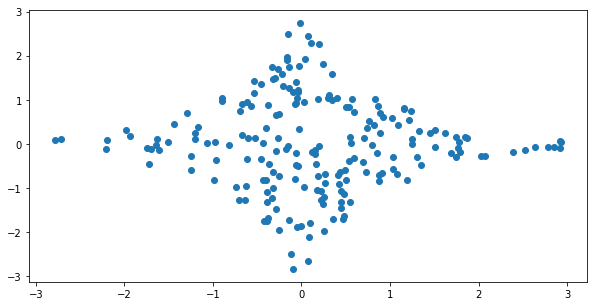

In [8]:
plt.scatter(X, Y);

Выборки не имеют тяжелых хвостов и выбросов (довольно похожи на нормальные), значит, можно воспользоваться критерием Пирсона.

In [9]:
corr, p = sts.pearsonr(X, Y)
corr, p

(-0.025961027346907174, 0.715182614347085)

Коэффициент корреляции довольно маленький, и p-value говорит о том, что не следует отвергать гипотезу о некоррелированности выборок, то есть на уровне значимости 0.05 мы считаем их независимыми. Тем не менее, из графика можно сделать вывод, что зависимость все-таки есть, однако она нелинейная и не улавливается выборочным коэффициентом корреляции. 

# Задача 3

In [10]:
data = np.load('hw5t3.npy')
data.shape

(400, 2)

In [11]:
data[:5]

array([['Humpty-Dumpty', '20.2746443343'],
       ['Humpty-Dumpty', '10.9149413639'],
       ['Bandersnatch', '12.5698948252'],
       ['Humpty-Dumpty', '23.4057721493'],
       ['Humpty-Dumpty', '2.02567861426']], dtype='<U25')

In [12]:
names = np.unique(data[:, 0])
names

array(['Bandersnatch', 'Humpty-Dumpty', 'Mr. Fattakhov',
       'Tweedledee and Tweedledum'], dtype='<U25')

Отобразим времена наливания чашки чая для каждого гостя.

In [13]:
df = pd.DataFrame(data, columns=['name', 'time'])
df['time'] = pd.to_numeric(df['time'])
df.head()

,name,time
0,Humpty-Dumpty,20.274644
1,Humpty-Dumpty,10.914941
2,Bandersnatch,12.569895
3,Humpty-Dumpty,23.405772
4,Humpty-Dumpty,2.025679


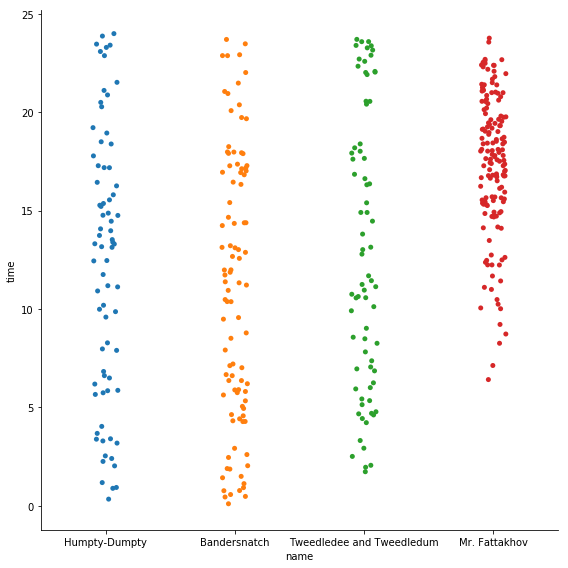

In [14]:
sns.catplot(x='name', y='time', data=df, height=8);

Видим, что мистер Фаттахов пил чай в основном в более позднее время, то есть зависимость должна быть. Распределение времен для каждого гостя скорее равномерное, чем нормальное, поэтому здесь можно применить критерий, основанный на разбиении множества значений и таблице сопряженности (из-за равномерности для полученных ячеек с высокой вероятностью будет выполнено условие применимости критерия хи-квадрат). Разобьем интервал времен на 8 кусков.

In [15]:
df['time'].min()

0.10018754090500001

In [16]:
df['time'].max() 

23.992018823800002

In [17]:
thresholds = np.arange(0, 25, 3)
thresholds

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [18]:
table = []
for name in df['name'].unique():
    raw = []
    for j in range(1, 9):
        raw.append(len(df.loc[(df['name'] == name)
                          & (thresholds[j - 1] <= df['time'])
                          & (df['time'] < thresholds[j])]['time']))
    table.append(raw)
table = np.array(table)

In [19]:
table

array([[ 8, 10,  7,  8, 15, 11,  7,  9],
       [16, 14, 11, 13, 12, 17,  6,  8],
       [ 5, 11, 10, 12,  7,  8,  6, 15],
       [ 0,  0,  4,  9, 20, 46, 49, 26]])

In [20]:
chi2, p, dof, ex = sts.chi2_contingency(table, correction=False)
chi2, p, dof

(114.91455226885947, 6.065214451825338e-15, 21)

Проверка условия:

In [21]:
ex >= 5

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

Гипотеза о независимости отвергается на уровне значимости 0.05, значит время наполнения чашки зависит от того, кто ее наполняет.

# Задача 4

In [22]:
samples = np.load('hw5t4.npy')
samples.shape

(10, 100)

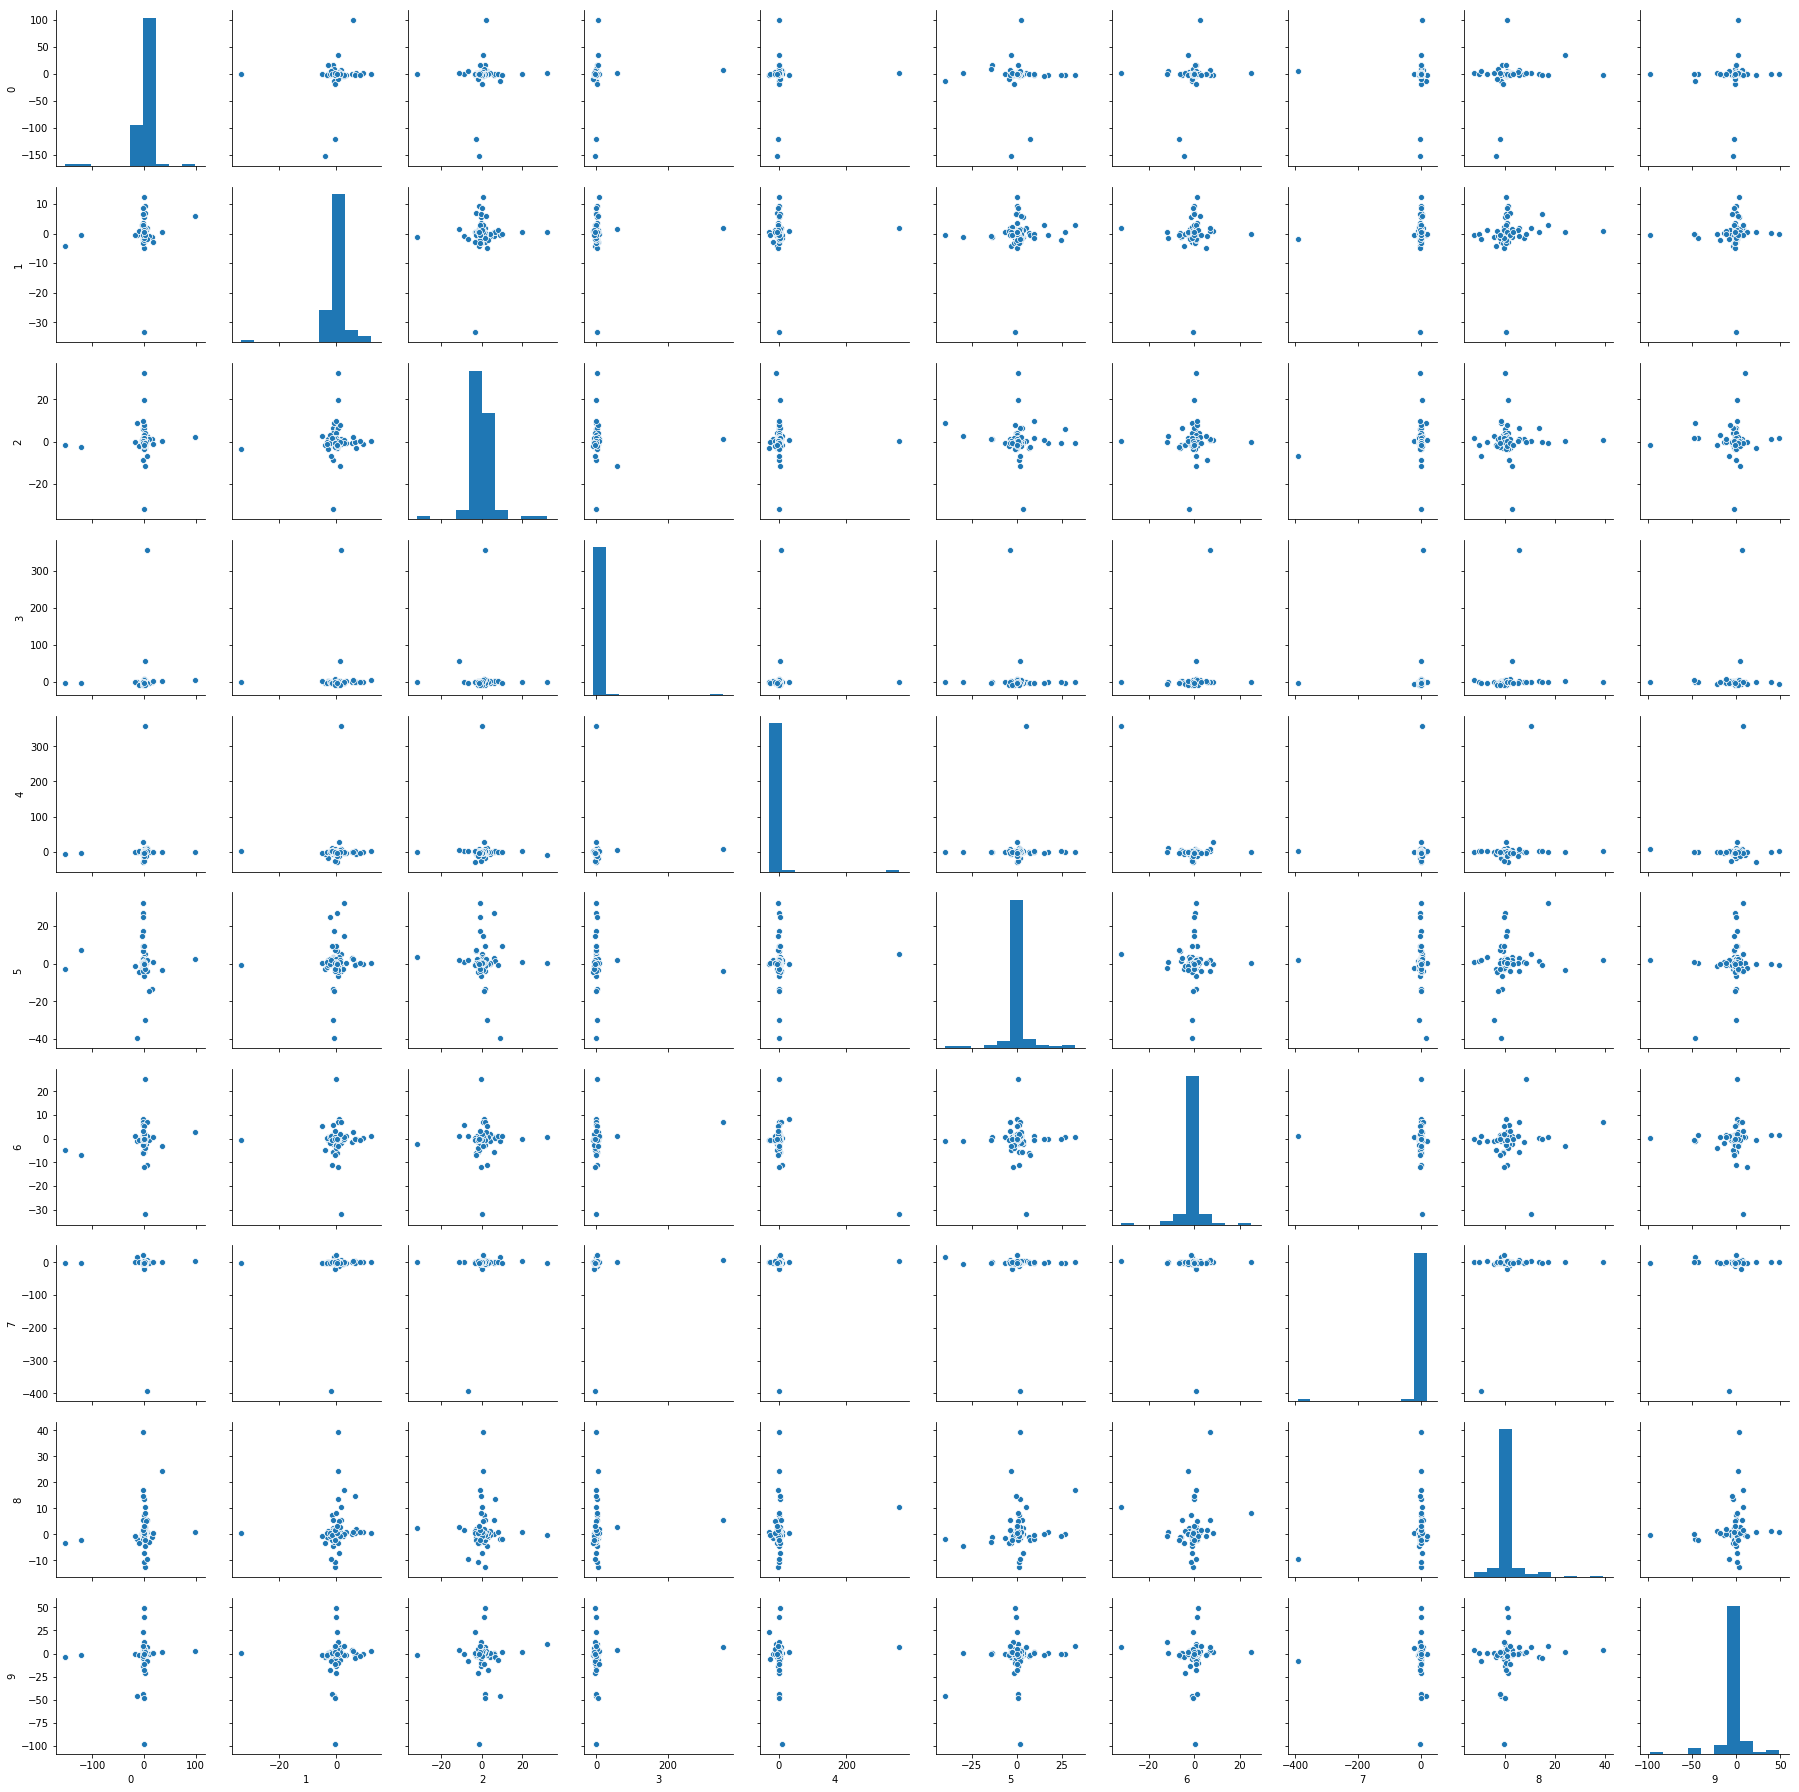

In [23]:
sns.pairplot(pd.DataFrame(samples.T));

Выборки содержат выбросы и не все из них похожи на нормальные, так что будем использовать коэффициент ранговой корреляции Кэндалла. Посчитаем корреляции и p-value для всех пар выборок и воспользуемся методом Холла для множественной проверки гипотез. 

In [24]:
pd.DataFrame(samples.T).corr('kendall')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.055354,0.046869,0.168485,0.009293,-0.072727,0.027475,0.136162,0.100202,0.146667
1,0.055354,1.000000,0.004848,0.030303,0.000404,-0.033939,0.090505,0.131313,0.215758,0.136970
2,0.046869,0.004848,1.000000,0.127677,0.058990,-0.056970,0.115960,0.018586,-0.039192,0.035556
3,0.168485,0.030303,0.127677,1.000000,0.090101,0.049293,0.094545,0.168485,0.122828,0.070707
4,0.009293,0.000404,0.058990,0.090101,1.000000,0.081616,0.034747,0.123232,0.088889,0.069091
5,-0.072727,-0.033939,-0.056970,0.049293,0.081616,1.000000,-0.032727,0.037980,0.086869,0.025859
6,0.027475,0.090505,0.115960,0.094545,0.034747,-0.032727,1.000000,-0.001616,0.154747,0.088081
7,0.136162,0.131313,0.018586,0.168485,0.123232,0.037980,-0.001616,1.000000,0.140606,0.110303
8,0.100202,0.215758,-0.039192,0.122828,0.088889,0.086869,0.154747,0.140606,1.000000,0.152727
9,0.146667,0.136970,0.035556,0.070707,0.069091,0.025859,0.088081,0.110303,0.152727,1.000000


In [25]:
def holm(samples, alpha=0.05):
    pairs = []
    pvalues = []
    for i in range(len(samples)):
        for j in range(i + 1, len(samples)):
            pairs.append((i, j))
            corr, p = sts.kendalltau(samples[i], samples[j])
            pvalues.append(p)
                
    m = len(pvalues)
    stop = m
    acc = False
    answers = np.full(m, True)
    for i, (num, pval) in (enumerate(sorted(enumerate(pvalues), key=lambda x: x[1]))):
        threshold = alpha / (m - i)
        if pval >= threshold:
            stop = i
            acc = True
        print('{}: {}, p={}, threshold={}, acc={}'.format(i+1, pairs[num], pval, threshold, acc))
        if acc:
            break
        answers[num] = acc
    return answers

In [26]:
holm(samples)

1: (1, 8), p=0.0014695583250515314, threshold=0.0011111111111111111, acc=True


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

Мы принимаем все гипотезы о попарной независимости выборок. Проверим независимость в совокупности с помощью коэффициента конкордации.

In [27]:
spearmans = pd.DataFrame(samples.T).corr('spearman')

In [28]:
sp_mean = spearmans.values[np.triu_indices_from(spearmans.values,1)].mean()
sp_mean

0.1042912291229123

In [29]:
k = len(samples)
n = len(samples[0])
W = (k - 1)/ k * sp_mean + 1 / k
W

0.19386210621062108

In [30]:
k * (n - 1) * W

191.92348514851489

In [31]:
sts.chi2(df=(n - 1)).ppf(0.95)

123.2252214533618

Значение статистики больше квантиля, значит, мы отвергаем гипотезу о независимости выборок в совокупности на уровне 0.05.

# Задача 5

In [32]:
samples = np.load('hw5t5.npy')
samples.shape

(4, 200)

In [33]:
df = pd.DataFrame(samples.T)

In [34]:
df.head()

,0,1,2,3
0,1.991130,-2.381746,2.406854,1.353428
1,2.050368,-2.855413,3.430861,2.835474
2,1.159320,-0.195712,-1.297069,-0.457118
3,2.001448,-2.204353,2.210895,3.870870
4,0.245754,-0.488714,0.125680,0.253366


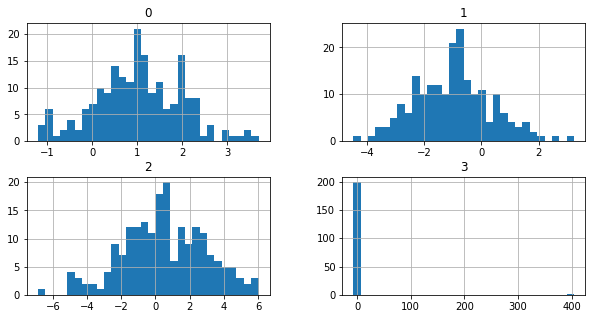

In [35]:
df.hist(bins=30);

Видим, что четвертая выборка содержит выбросы.

In [36]:
sorted(df[3], reverse=True)[:5]

[404.0,
 6.557715354444672,
 5.839704687098959,
 5.516957978328405,
 5.488891195408137]

Выброс один, заменим его на среднее значение, чтобы можно было считать корреляцию Пирсона. 

In [37]:
df[3][df[3] == 404] = df[3][df[3] < 404].mean()

In [38]:
sorted(df[3], reverse=True)[:5]

[6.557715354444672,
 5.839704687098959,
 5.516957978328405,
 5.488891195408137,
 5.3355622259572275]

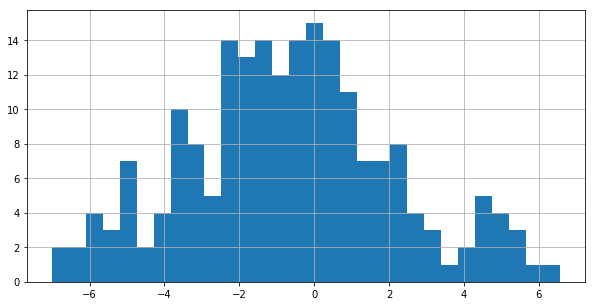

In [39]:
df[3].hist(bins=30);

Если выборка действительно из многомерного нормального распределения, то корреляции на тренировочной и тестовой выборке должны совпасть.

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size = 0.5, random_state=18)

In [41]:
X_train.head()

,0,1,2,3
169,2.339748,-3.412205,3.224395,2.519086
86,1.439690,0.505504,-3.033552,1.217047
140,3.434463,-4.490793,5.067744,-0.994914
154,2.171608,-1.545385,0.112708,2.347520
92,1.380237,-0.098346,-1.095874,-1.753427


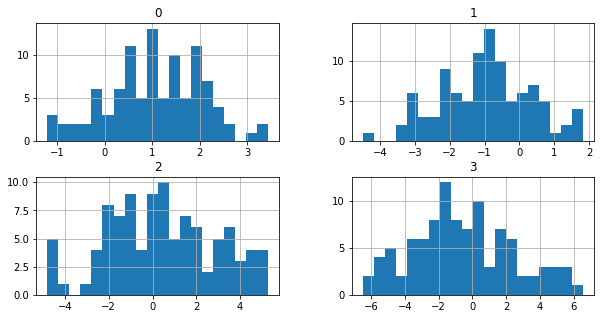

In [42]:
X_train.hist(bins=20);

In [43]:
train_corr = X_train.corr(method='pearson')
train_corr

,0,1,2,3
0,1.000000,-0.629764,0.274420,0.285285
1,-0.629764,1.000000,-0.862855,0.071904
2,0.274420,-0.862855,1.000000,-0.123038
3,0.285285,0.071904,-0.123038,1.000000


In [44]:
test_corr = X_test.corr(method='pearson')
test_corr

,0,1,2,3
0,1.000000,-0.703104,0.362791,0.367623
1,-0.703104,1.000000,-0.856466,-0.002221
2,0.362791,-0.856466,1.000000,-0.026115
3,0.367623,-0.002221,-0.026115,1.000000


In [45]:
np.linalg.norm(train_corr - test_corr) / np.linalg.norm(train_corr)

0.10255269408492793

Получили довольно большое относительное различие норм матрицы, так что, скорее всего, это не многомерное нормальное распределение.